<a href="https://colab.research.google.com/github/davidr1008/Day11/blob/main/Day11_Part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("/content/Social_Network_Ads.csv")

In [4]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x , y, test_size = 0.20)

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [9]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [10]:
y_pred = classifier.predict(x_test)

In [11]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred, y_test)
print(cm)
accuracy_score(y_pred, y_test)

[[45  7]
 [ 0 28]]


0.9125

In [12]:
print(classifier.predict(sc.transform([[30, 100000]])))

[1]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


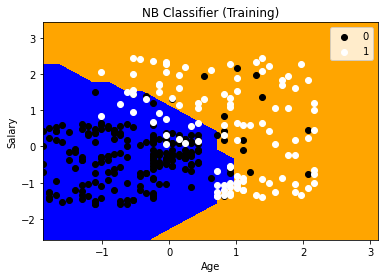

In [14]:
from matplotlib.colors import ListedColormap

x_set, y_set =  sc.inverse_transform(x_train), y_train

x1,x2 = np.meshgrid(np.arange(start = x_set [:, 0].min() - 0, stop = x_set [:, 0].max(0)+1 , step = 0.25),
                    np.arange(start = x_set [:, 1].min() - 1, stop = x_set [:, 1].max() + 1, step = 0.25))

plt.contourf(x1, x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
             cmap = ListedColormap(("blue", "orange")))

plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

for i,j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(("black", "white"))(i), label = j)

plt.title("NB Classifier (Training)")
plt.xlabel("Age")
plt.ylabel("Salary")

plt.legend()

plt.show()